### Analyse Backtest

In [1]:
import sys
sys.path.append('../../')
import pandas as pd
import datetime
import os
from pprint import pprint
import math
import matplotlib.pyplot as plt
import helpers.backtest as bt_helper

pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 20) 

plt.style.use('classic')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.limits'] = [-1000000000, 1000000000]

In [63]:
bt_helper.remove_backtest_output("some_bt", yes=True)

In [65]:
bt_name = 'some_bt'
current_bt_path = f'{bt_helper.bt_output_base_path}/{bt_name}'

os.listdir(current_bt_path)

['MESZ24-CME']

 trades -> (203, 15)


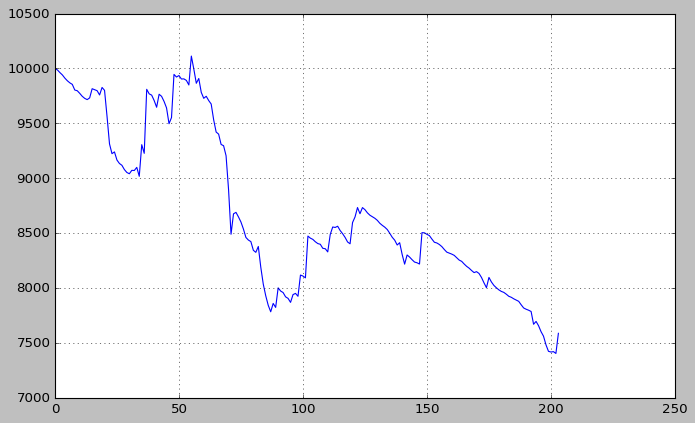

In [74]:
instrument = "MESZ24-CME"

trades = pd.read_csv(f'{current_bt_path}/{instrument}/trades.csv')
trades_f2f = pd.read_csv(f'{current_bt_path}/{instrument}/trades_f2f.csv')
stats = pd.read_csv(f'{current_bt_path}/{instrument}/trade_statistics.csv')
print(f' trades -> {trades.shape}')

account_balance = 10000

res = [account_balance]
for pl in trades.trade_profit_loss:
    account_balance += pl
    res.append(account_balance)

plt.plot(res)